In [2]:
from utils import GM
import utils
import numpy as np
import ot
from tqdm import trange

#plot and image
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [3]:
ims = []
resize_pix = 64
# for filename in sorted(os.listdir("../data/2d_shapes/")):
for filename in sorted(glob.glob("data/2d_shapes/*.gif")):
    #load
    im = Image.open(filename)
    im = im.convert("L")
    
    #lower threshold
    im = np.array(im)
    im[im < 0.01] = 0
    
    #resize
    im = Image.fromarray(im)
    im1 = im.resize((resize_pix,resize_pix))
    #im1 = im1.filter(ImageFilter.FIND_EDGES)
    
    #upper threshold
    im1 = np.array(im1,dtype = float)
    im1[im1!= 0] = 1
    ims.append(im1/np.sum(im1))

N = len(ims)

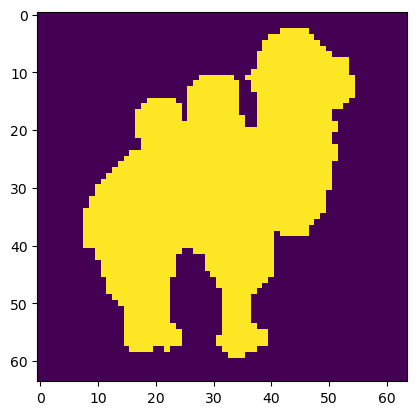

In [4]:
plt.imshow(ims[280])
plt.show()

In [5]:
#pick gm spaces
i = 280
j = 290
points,measure = utils.img2atomic(ims[i])
X = GM(mode="euclidean",gauge_mode = "euclidean",X=points,xi=measure,normalize_gauge=True)
points,measure = utils.img2atomic(ims[j])
Y = GM(mode="euclidean",gauge_mode = "euclidean",X=points,xi=measure,normalize_gauge=True)

#compute GW Plan
P,log = ot.gromov.gromov_wasserstein(X.g,Y.g,X.xi,Y.xi,log=True)
print("GW Transport costs: {0}".format(log["gw_dist"]))

GW Transport costs: 0.000999029755814246


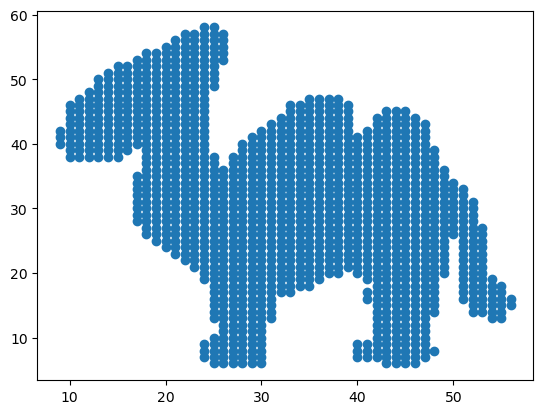

In [6]:
plt.scatter(points[:, 0], points[:, 1])

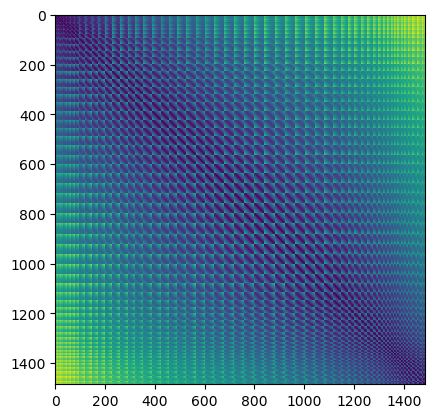

In [7]:
plt.imshow(X.g, interpolation="nearest", )

/Users/alonsoc1s/miniconda3/envs/tes_smalldata_hackathon/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


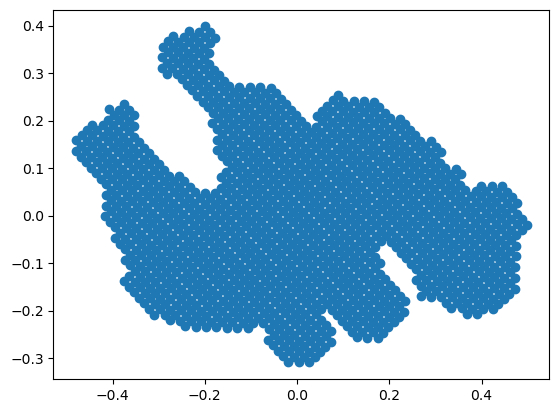

In [10]:
from sklearn.manifold import MDS

mds = MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    dissimilarity="precomputed",
    n_jobs=1,
)
pos = mds.fit(X.g).embedding_
plt.scatter(pos[:, 0], pos[:, 1])

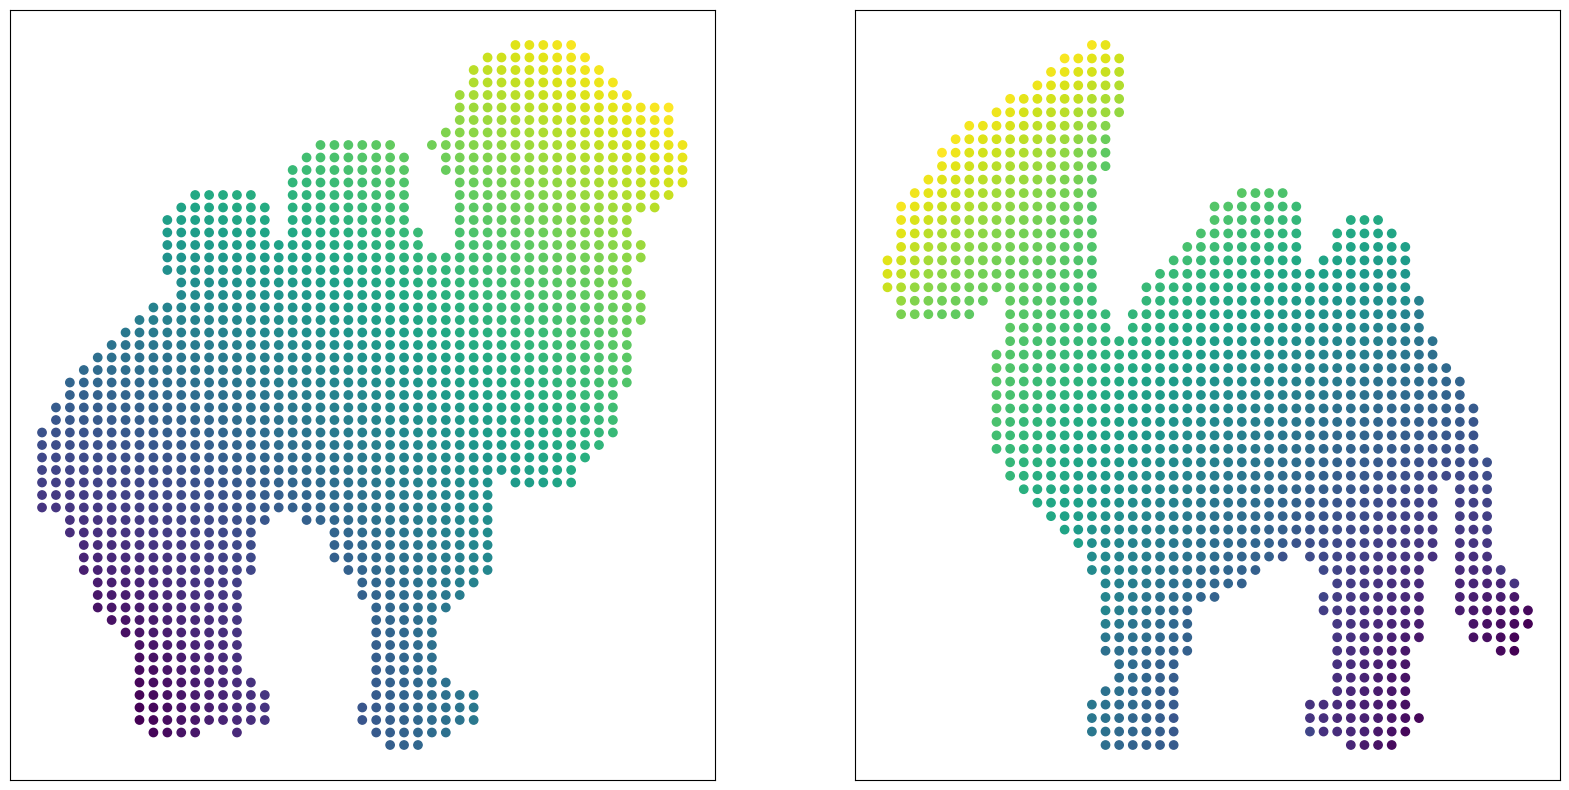

In [25]:
#visualize GW
cX = np.linalg.norm(X.X - np.min(X.X),axis=1)
#colour-code Y according to transport P
cY = (P.T / np.sum(P,axis=1)).dot(cX)

fig,ax = plt.subplots(1,2,figsize=(20,10))
for x in ax.ravel():
    x.set_xticks([])
    x.set_yticks([])
ax[0].scatter(X.X[:,0],X.X[:,1],c=cX)
ax[1].scatter(Y.X[:,0],Y.X[:,1],c=cY)
plt.show()